In [27]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [28]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")
microplastics_csv

FID                    Date  Latitude  Longitude          Oceans  \
0      35217    4/6/2005 12:00:00 AM    2.1900  -135.7300   Pacific Ocean   
1      36142   2/24/2002 12:00:00 AM  -12.6900  -142.3000   Pacific Ocean   
2      35881  10/25/2010 12:00:00 AM   19.6200  -146.5000   Pacific Ocean   
3      36474  11/16/2003 12:00:00 AM   18.9700  -143.4700   Pacific Ocean   
4      34553    3/5/2001 12:00:00 AM   19.3800   -74.0900  Atlantic Ocean   
...      ...                     ...       ...        ...             ...   
11301  37329  11/28/2014 12:00:00 AM   15.5034   -52.4550  Atlantic Ocean   
11302  36788  12/11/2014 12:00:00 AM   15.3929   -57.7041  Atlantic Ocean   
11303  29706   11/7/1995 12:00:00 AM   17.3500   -60.2000  Atlantic Ocean   
11304  32460  10/31/2001 12:00:00 AM   18.6300   -59.6400  Atlantic Ocean   
11305  37870   5/21/2014 12:00:00 AM   18.0327   -63.0973  Atlantic Ocean   

             Regions SubRegions  Measurement       Unit Density Range  ...  \
0                NaN        NaN      0.00000  pieces/m3      0-0.0005  ...   
1                NaN        NaN      0.00000  pieces/m3      0-0.0005  ...   
2                NaN        NaN      0.00216  pieces/m3  0.0005-0.005  ...   
3                NaN        NaN      0.00000  pieces/m3      0-0.0005  ...   
4      Caribbean Sea        NaN      0.00000  pieces/m3      0-0.0005  ...   
...              ...        ...          ...        ...           ...  ...   
11301            NaN        NaN      0.00200  pieces/m3  0.0005-0.005  ...   
11302            NaN        NaN      0.02500  pieces/m3       0.005-1  ...   
11303            NaN        NaN      0.00864  pieces/m3       0.005-1  ...   
11304            NaN        NaN      0.01080  pieces/m3       0.005-1  ...   
11305  Caribbean Sea        NaN      0.00200  pieces/m3  0.0005-0.005  ...   

      Accession Number                                     Accession Link  \
0               211008  https://www.ncei.noaa.gov/access/metadata/land...   
1               211008  https://www.ncei.noaa.gov/access/metadata/land...   
2               211008  https://www.ncei.noaa.gov/access/metadata/land...   
3               211008  https://www.ncei.noaa.gov/access/metadata/land...   
4               211007  https://www.ncei.noaa.gov/access/metadata/land...   
...                ...                                                ...   
11301           211009  https://www.ncei.noaa.gov/access/metadata/land...   
11302           211009  https://www.ncei.noaa.gov/access/metadata/land...   
11303           211007  https://www.ncei.noaa.gov/access/metadata/land...   
11304           211007  https://www.ncei.noaa.gov/access/metadata/land...   
11305           211009  https://www.ncei.noaa.gov/access/metadata/land...   

                                   GlobalID         CreationDate  \
0      6d278226-565e-4ed0-b46a-e1cabb32ecc0  3/9/2023 9:05:33 PM   
1      6fb35a58-21b6-4cce-9dbb-f9c222bc311d  3/9/2023 9:05:33 PM   
2      67f360ab-017e-4a86-931b-6f7336c2c206  3/9/2023 9:05:33 PM   
3      5be50d3b-7343-45f0-ac71-19a3cdc047ea  3/9/2023 9:05:33 PM   
4      5e54fac6-640b-4445-8fff-94a9498d6168  3/9/2023 9:05:33 PM   
...                                     ...                  ...   
11301  6084e526-1912-4ee3-95ae-de0f245d6ac8  3/9/2023 9:05:33 PM   
11302  40034069-71ef-4b88-b504-6aa74d855dd3  3/9/2023 9:05:33 PM   
11303  791c578c-b672-4e4b-a885-0c3fdce11f8d  3/9/2023 9:05:33 PM   
11304  46335627-8df0-400e-bef8-7ff0afed6798  3/9/2023 9:05:33 PM   
11305  09ce8156-fffb-4b19-b200-efc0d319d0a6  3/9/2023 9:05:33 PM   

             Creator             EditDate         Editor  \
0      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
1      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
2      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
3      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
4      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
...              ...                  ...    

In [29]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
clean_microplastics = microplastics_csv[["Date", "Oceans","Regions","Measurement","Unit","Sampling Method"]]
clean_microplastics.head()

Date          Oceans        Regions  Measurement  \
0    4/6/2005 12:00:00 AM   Pacific Ocean            NaN      0.00000   
1   2/24/2002 12:00:00 AM   Pacific Ocean            NaN      0.00000   
2  10/25/2010 12:00:00 AM   Pacific Ocean            NaN      0.00216   
3  11/16/2003 12:00:00 AM   Pacific Ocean            NaN      0.00000   
4    3/5/2001 12:00:00 AM  Atlantic Ocean  Caribbean Sea      0.00000   

        Unit Sampling Method  
0  pieces/m3     Neuston net  
1  pieces/m3     Neuston net  
2  pieces/m3     Neuston net  
3  pieces/m3     Neuston net  
4  pieces/m3     Neuston net

In [30]:
clean_microplastics["Year"] = pd.Series()
clean_microplastics.head()

Date          Oceans        Regions  Measurement  \
0    4/6/2005 12:00:00 AM   Pacific Ocean            NaN      0.00000   
1   2/24/2002 12:00:00 AM   Pacific Ocean            NaN      0.00000   
2  10/25/2010 12:00:00 AM   Pacific Ocean            NaN      0.00216   
3  11/16/2003 12:00:00 AM   Pacific Ocean            NaN      0.00000   
4    3/5/2001 12:00:00 AM  Atlantic Ocean  Caribbean Sea      0.00000   

        Unit Sampling Method  Year  
0  pieces/m3     Neuston net   NaN  
1  pieces/m3     Neuston net   NaN  
2  pieces/m3     Neuston net   NaN  
3  pieces/m3     Neuston net   NaN  
4  pieces/m3     Neuston net   NaN

In [31]:
#cleaning time column
for i in range(len(clean_microplastics["Date"])):
    date_time = clean_microplastics.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics.loc[i,"Date"]=date
clean_microplastics.head()

Date          Oceans        Regions  Measurement       Unit  \
0    4/6/2005   Pacific Ocean            NaN      0.00000  pieces/m3   
1   2/24/2002   Pacific Ocean            NaN      0.00000  pieces/m3   
2  10/25/2010   Pacific Ocean            NaN      0.00216  pieces/m3   
3  11/16/2003   Pacific Ocean            NaN      0.00000  pieces/m3   
4    3/5/2001  Atlantic Ocean  Caribbean Sea      0.00000  pieces/m3   

  Sampling Method  Year  
0     Neuston net   NaN  
1     Neuston net   NaN  
2     Neuston net   NaN  
3     Neuston net   NaN  
4     Neuston net   NaN

In [32]:
for x in range(len(clean_microplastics["Year"])):
    year_time = clean_microplastics.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics.loc[x,"Year"]=year
clean_microplastics

Date          Oceans        Regions  Measurement       Unit  \
0        4/6/2005   Pacific Ocean            NaN      0.00000  pieces/m3   
1       2/24/2002   Pacific Ocean            NaN      0.00000  pieces/m3   
2      10/25/2010   Pacific Ocean            NaN      0.00216  pieces/m3   
3      11/16/2003   Pacific Ocean            NaN      0.00000  pieces/m3   
4        3/5/2001  Atlantic Ocean  Caribbean Sea      0.00000  pieces/m3   
...           ...             ...            ...          ...        ...   
11301  11/28/2014  Atlantic Ocean            NaN      0.00200  pieces/m3   
11302  12/11/2014  Atlantic Ocean            NaN      0.02500  pieces/m3   
11303   11/7/1995  Atlantic Ocean            NaN      0.00864  pieces/m3   
11304  10/31/2001  Atlantic Ocean            NaN      0.01080  pieces/m3   
11305   5/21/2014  Atlantic Ocean  Caribbean Sea      0.00200  pieces/m3   

      Sampling Method  Year  
0         Neuston net  2005  
1         Neuston net  2002  
2         Neuston net  2010  
3         Neuston net  2003  
4         Neuston net  2001  
...               ...   ...  
11301     Grab sample  2014  
11302     Grab sample  2014  
11303     Neuston net  1995  
11304     Neuston net  2001  
11305     Grab sample  2014  

[11306 rows x 7 columns]

In [33]:
# Sort years in in ascending order
sorted_df = clean_microplastics.sort_values(by="Year")

# Filter years so all samples are according sampling in California's Seas
filtered_df = sorted_df[pd.to_datetime(sorted_df["Date"]).dt.year.isin([2014, 2015, 2016])]

In [34]:
# Calculate the microplastics mean for Atlantic Ocean
atlantic_df = filtered_df[(filtered_df["Oceans"] == "Atlantic Ocean")]
atlantic_mean = atlantic_df["Measurement"].mean()
atlantic_mean

0.02652752398989899

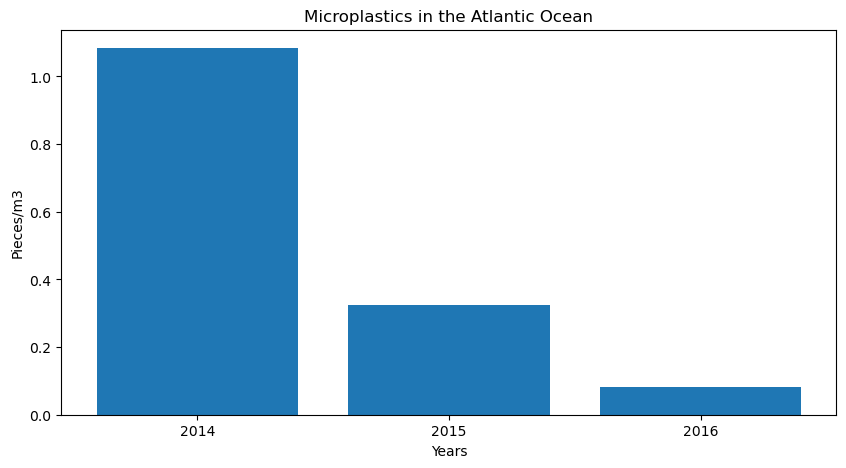

<Figure size 1000x500 with 0 Axes>

In [43]:
# Create Barplot
plt.bar(atlantic_df["Year"], atlantic_df["Measurement"])
plt.title("Microplastics in the Atlantic Ocean")
plt.xlabel("Years")
plt.ylabel("Pieces/m3")
plt.show()

# Save figure
plt.savefig("output_data/Microplastics in the Atlantic Ocean.png")

In [35]:
# Calculate the microplastics mean for Pacfic Ocean
pacific_df = filtered_df[(filtered_df["Oceans"] == "Pacific Ocean")]
pacific_mean = pacific_df["Measurement"].mean()
pacific_mean

1.9579067935174073

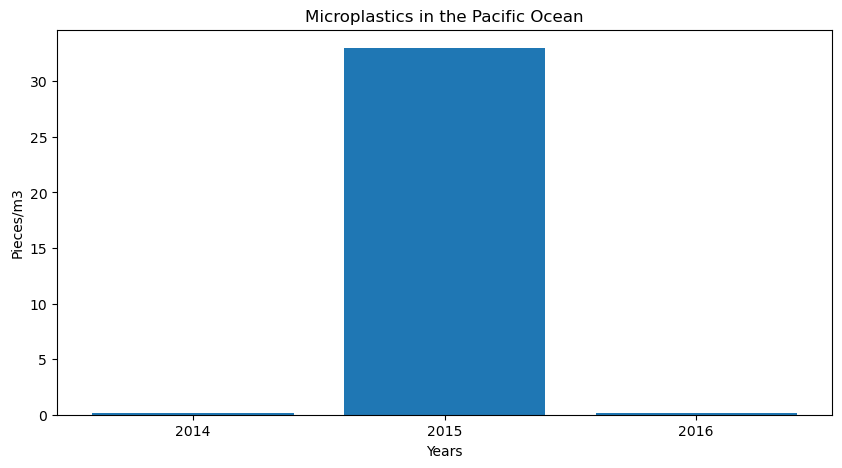

<Figure size 1000x500 with 0 Axes>

In [44]:
# Create Barplot
plt.bar(pacific_df["Year"], pacific_df["Measurement"])
plt.title("Microplastics in the Pacific Ocean")
plt.xlabel("Years")
plt.ylabel("Pieces/m3")
plt.show()

# Save figure
plt.savefig("output_data/Microplastics in the Pacific Ocean.png")

In [36]:
# Calculate Independent (Two Sample) t-test
atlantic_measurements = atlantic_df["Measurement"]
pacific_measurements = pacific_df["Measurement"]

t_statistic, p_value = stats.ttest_ind(atlantic_measurements, pacific_measurements)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -15.697399425748888
p-value: 8.327869074001523e-52


In [37]:
def gendata(loc1=0, loc2=0):
    sample_size = 50  # set the sample size
    atlantic_sample = atlantic_df["Measurement"].sample(n=sample_size, random_state=42)
    pacific_sample = pacific_df["Measurement"].sample(n=sample_size, random_state=42)
    
    # Create a scatter plot of data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(atlantic_sample)), atlantic_sample, label="Atlantic Ocean")
    plt.scatter(range(len(pacific_sample)), pacific_sample, label="Pacific Ocean")
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title('Ocean Measurements')
    plt.legend()
    
    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(atlantic_sample, 5, density=True, alpha=0.7, label="Atlantic Ocean")
    plt.hist(pacific_sample, 5, density=True, alpha=0.7, label="Pacific Ocean")
    plt.axvline(atlantic_sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(pacific_sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return atlantic_sample, pacific_sample

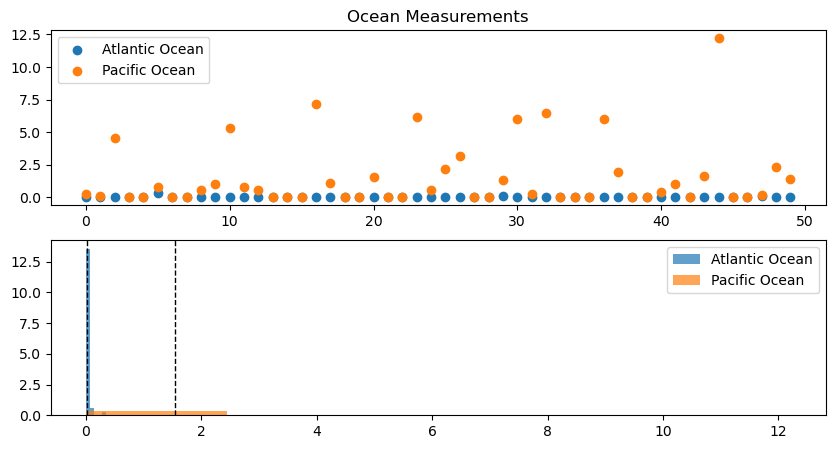

In [45]:
# Generate some data and show the scatter plot
atlantic_sample, pacific_sample = gendata()

# Save figure
plt.savefig("output_data/sample_oceans.png")

In [39]:
# Run the t-test on the two microplastics measurement samples. 
stats.ttest_ind(atlantic_sample, pacific_sample, equal_var=False)

Ttest_indResult(statistic=-4.214879675857894, pvalue=0.00010690516473237953)

In [26]:
# sample_size = 20  # set the sample size
# atlantic_sample = atlantic_df["Measurement"].sample(n=sample_size, random_state=42)
# pacific_sample = pacific_df["Measurement"].sample(n=sample_size, random_state=42)

# df = pd.DataFrame({
#     'Atlantic': atlantic_sample,
#     'Pacific': pacific_sample
# })

# # Create the bar plot
# ax = df.plot.bar()
# ax.set_xlabel('Sample')
# ax.set_ylabel('Measurement')
# plt.ylim(0, 1)
# ax.set_title('Microplastic Accumulation in Atlantic and Pacific Oceans')
# plt.show()

In [ ]:
# # Calculate mean measurement per Ocean
# measurement_per_ocean = clean_microplastics.groupby("Oceans")["Measurement"].mean()

# # Ocean Statistics
# oceans_mean = clean_microplastics.groupby(["Oceans"]).mean()["Measurement"]
# oceans_median = clean_microplastics.groupby(["Oceans"]).median()["Measurement"]
# oceans_max = clean_microplastics.groupby(["Oceans"]).max()["Measurement"]
# oceans_min = clean_microplastics.groupby(["Oceans"]).min()["Measurement"]

# oceans_statistics = pd.DataFrame ({
#     "Mean Measurement per Oceans": oceans_mean,
#     "Median Measurement per Oceans": oceans_median,
#     "Max Measurement per Oceans": oceans_max,
#     "Min Measurement per Oceans": oceans_min})

# oceans_statistics

In [ ]:
# # taking columns we need 
# # clean_microplastics = microplastics_csv[["Date","Oceans","Regions","Measurement","Unit","Sampling Method"]]
# # # clean_microplastics["Year"] = pd.Series()
# # clean_microplastics

# df = pd.DataFrame({'date': ['2022-01-01', '2022-02-01', '2022-03-01'],
#                    'value': [10, 20, 30]})
# clean_microplastics["Date"] = pd.to_datetime(clean_microplastics["Date"])  # Convert string dates to datetime objects

# # Add a new column 'year' with the year of each date
# clean_microplastics["Year"] = clean_microplastics["Date"].dt.year

# print(clean_microplastics.head())

In [ ]:
# # Create Barplot
# plt.bar(clean_microplastics["Oceans"], clean_microplastics["Measurement"])
# plt.title("Microplastics per Ocean")
# plt.xlabel("Oceans")
# plt.ylabel("Pieces/m3")
# plt.show()

In [ ]:
# sampling_mean = clean_microplastics.groupby(["Sampling Method"]).mean()["Measurement"]
# sampling_median = clean_microplastics.groupby(["Sampling Method"]).median()["Measurement"]
# sampling_max = clean_microplastics.groupby(["Sampling Method"]).max()["Measurement"]
# sampling_min = clean_microplastics.groupby(["Sampling Method"]).min()["Measurement"]

# sampling_statistics = pd.DataFrame ({
#     "Mean Measurement per Sampling": sampling_mean,
#     "Median Measurement per Sampling": sampling_median,
#     "Max Measurement per Sampling": sampling_max,
#     "Min Measurement per Sampling": sampling_min})

# sampling_statistics.head()

In [ ]:
# # Filter only Pacific Ocean

# pacific_df = clean_microplastics[(clean_microplastics["Oceans"] == "Pacific Ocean")]

# # Pacific Statistics
# pacific_mean = pacific_df.groupby(["Year"]).mean()["Measurement"]
# pacific_median = pacific_df.groupby(["Year"]).median()["Measurement"]
# pacific_max = pacific_df.groupby(["Year"]).max()["Measurement"]
# pacific_min = pacific_df.groupby(["Year"]).min()["Measurement"]

# pacific_statistics = pd.DataFrame ({
#     "Mean Measurement Pacific Ocean": pacific_mean,
#     "Median Measurement Pacific Ocean": pacific_median,
#     "Max Measurement Pacific Ocean": pacific_max,
#     "Min Measurement Pacific Ocean": pacific_min})

# pacific_statistics

In [ ]:
# # Transpose the pacific_statistics DataFrame
# pacific_stats_transposed = pacific_statistics.transpose()

# # Create a line plot with multiple lines
# pacific_stats_transposed.plot(kind="line", marker="o")

In [ ]:
# pacific_map = folium.Map(location=[pacific_df["Latitude"].mean(), pacific_df["Longitude"].mean()], zoom_start=10)

# # Add a marker for each point in the DataFrame
# for index, row in pacific_df.iterrows():
#     folium.Marker([row["Latitude"], row["Longitude"]]).add_to(pacific_map)

# # Display the map
# pacific_map

In [ ]:
# per region
# # Calculate mean measurement per region
# measurement_per_regions = clean_microplastics.dropna().groupby("Regions")["Measurement"].mean()

# # Regions Statistics
# regions_mean = clean_microplastics.groupby(["Regions"]).mean()["Measurement"]
# regions_median = clean_microplastics.groupby(["Regions"]).median()["Measurement"]
# regions_max = clean_microplastics.groupby(["Regions"]).max()["Measurement"]
# regions_min = clean_microplastics.groupby(["Regions"]).min()["Measurement"]

# regions_statistics = pd.DataFrame ({
#     "Mean Measument per Region": regions_mean,
#     "Median Measument per Region": regions_median,
#     "Max Measument per Region": regions_max,
#     "Min Measument per Region": regions_min})

# regions_statistics

In [ ]:
# sample_size = 50  # set the sample size
# atlantic_sample = atlantic_df["Measurement"].sample(n=sample_size, random_state=42)
# pacific_sample = pacific_df["Measurement"].sample(n=sample_size, random_state=42)

# # Create the scatter plot
# plt.scatter(atlantic_sample['Date'], atlantic_sample['Measurement'], label='Atlantic Ocean')
# plt.scatter(pacific_sample['Date'], pacific_sample['Measurement'], label='Pacific Ocean')

# # Add labels and a title
# plt.xlabel('Date')
# plt.ylabel('Measurement')
# plt.title('Ocean Measurements')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:
# # Create a DataFrame for each ocean in the data
# atlantic_df = filtered_df[(filtered_df["Oceans"] == "Atlantic Ocean")]
# pacific_df = filtered_df[(filtered_df["Oceans"] == "Pacific Ocean")]
# arctic_df = filtered_df[(filtered_df["Oceans"] == "Arctic Ocean")]

# # Calculate average of each ocean to then compare with only California's Seas
# atlantic_mean = atlantic_df.groupby(["Year"]).mean()["Measurement"]
# pacific_mean = pacific_df.groupby(["Year"]).mean()["Measurement"]
# arctic_mean = arctic_df.groupby(["Year"]).mean()["Measurement"]

# oceans_statistics = pd.DataFrame ({
#     "Mean Measument per Atlantic Ocean": atlantic_mean,
#     "Mean Measument per Pacific Ocean": pacific_mean,
#     "Mean Measument per Arctic Ocean": arctic_mean})

# # print(oceans_statistics)

# std_dev_ao = atlantic_df['Measurement'].std()
# std_dev_po = pacific_df['Measurement'].std()
# std_dev_aro = arctic_df['Measurement'].std()

# # print the result
# print(f"The Std Dev for Atlantic Ocean is: {std_dev_ao}")
# print("\n")
# print(f"The Std Dev for Pacific Ocean is: {std_dev_po}")
# print("\n")
# print(f"The Std Dev for Arctic Ocean is: {std_dev_aro}")


In [ ]:
# # extract the "measurement" and "date" columns from the DataFrame
# measurement = atlantic_df["Measurement"]
# date = pd.to_datetime(atlantic_df["Year"]) 
# # date = atlantic_df["Date"]

# # create a scatter plot
# plt.scatter(date, measurement)
# plt.xticks(rotation=90)

# # add axis labels and a title
# plt.xlabel("Date")
# plt.ylabel("Measurement")
# plt.title("Atlantic Ocean Measurement")

# # display the plot
# plt.show()


In [ ]:
# # Select data based on Coordinates of California seas, to then calculate mean for CA
# california_df = sorted_df[(sorted_df["Latitude"] >= 32.5) & (sorted_df["Latitude"] <= 42) & (sorted_df["Longitude"] <= -117.5) & (sorted_df["Longitude"] >= -124)]
# # print(california_df)

# # California Average
# california_mean = california_df.groupby(["Year"]).mean()["Measurement"]
# print(california_mean)

In [ ]:
# year = filtered_df.loc[(filtered_df["Oceans"] == "Atlantic Ocean"),"Year"]
# atlantic_ocean = filtered_df.loc[(filtered_df["Oceans"] == "Atlantic Ocean"),"Measurement"]
# atlantic_ocean

In [ ]:
# # Generate a bar plot of year versus measurement of microplastics
# # Create bar plot
# plt.bar(atlantic_mean.index, atlantic_mean.values)
# plt.xlabel("Year")
# plt.ylabel("Measurement (pieces/m3)")

# # Show plot
# plt.show()

In [ ]:
# # Generate a bar plot of year versus measurement of microplastics
# # Create bar plot
# plt.bar(atlantic_mean.index, atlantic_mean.values)
# plt.xlabel("Year")
# plt.ylabel("Measurement (pieces/m3)")

# # Show plot
# plt.show()

In [ ]:
# # Create bar plot
# plt.bar(pacific_mean.index, pacific_mean.values)
# plt.xlabel("Year")
# plt.ylabel("Measurement (pieces/m3)")

# # Show plot
# plt.show()

In [ ]:
# # Create bar plot
# plt.bar(arctic_mean.index, arctic_mean.values)
# plt.xlabel("Year")
# plt.ylabel("Measurement (pieces/m3)")

# # Show plot
# plt.show()

In [ ]:
# # Create bar plot
# plt.bar(california_mean.index, california_mean.values)
# plt.xlabel("Year")
# plt.ylabel("Measurement (pieces/m3)")

# # Show plot
# plt.show()

In [ ]:
# # Generate a facet plot of all 3 figures
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# # fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")

# # ax1.set_xlim(min(year), max(year))
# ax1.plot(atlantic_mean.index, atlantic_mean.values, linewidth=1, marker="o")
# # ax1.plot(year, pe_fit, "b--", linewidth=1)
# ax1.set_ylabel("Atlantic Ocean")

# # ax2.set_xlim(min(year), max(year))
# ax2.plot(pacific_mean.index, pacific_mean.values, linewidth=1, marker="o")
# # ax1.plot(year, pe_fit, "b--", linewidth=1)
# ax2.set_ylabel("Pacific Ocean")

# # ax3.set_xlim(min(year), max(year))
# ax3.plot(arctic_mean.index, arctic_mean.values, linewidth=1, marker="o")
# # ax1.plot(year, pe_fit, "b--", linewidth=1)
# ax3.set_ylabel("Arctic Ocean")

# ax4.set_xlim(min(year), max(year))
# ax4.plot(california_mean.index, california_mean.values, linewidth=1, marker="o")
# # ax1.plot(year, pe_fit, "b--", linewidth=1)
# ax4.set_ylabel("California's Seas")

# Create a linear plot to compare California's Seas with the rest of the Oceans

# plt.plot(atlantic_mean.index, atlantic_mean.values, label="Atlantic Ocean", color='blue')
# plt.plot(pacific_mean.index, pacific_mean.values, label="Pacific Ocean", color='blue')
# plt.plot(arctic_mean.index, arctic_mean.values, label="Arctic Ocean", color='blue')
# plt.plot(california_mean.index, california_mean.values, label="California's Seas", color='blue')

# Add axis labels and title
# plt.xlabel("Year")
# plt.ylabel("Measurement (pieces/m3)")
# plt.title("Microplastics mean Values for Atlantic, Pacific, and Arctic vs California's Seas")
# # plt.xticks(['2002', '2009', '2014', '2015', '2016'], rotation=90)
# # plt.ylim(bottom=-3, top=5 *1.1)


# # Add legend
# plt.legend()

# Show the plot
# plt.show()

# Save figure
# plt.savefig("output_data/general.png")

In [ ]:
# # Create Barplot
# plt.bar(measurement_per_regions.index, measurement_per_regions.values, color='blue', alpha=0.2)

# # set axis labels and title
# plt.xlabel('Region')
# plt.ylabel('Pieces/m3')
# plt.xticks(rotation="vertical")
# plt.title('Mean Microplastics Measurement by Region')

In [ ]:
# # Year Statistics
# year_mean = clean_microplastics.groupby(["Year"]).mean()["Measurement"]
# year_median = clean_microplastics.groupby(["Year"]).median()["Measurement"]
# year_max = clean_microplastics.groupby(["Year"]).max()["Measurement"]
# year_min = clean_microplastics.groupby(["Year"]).min()["Measurement"]

# year_statistics = pd.DataFrame ({
#     "Mean Measument per Year": year_mean,
#     "Median Measument per Year": year_median,
#     "Max Measument per Year": year_max,
#     "Min Measument per Year": year_min})

# year_statistics

In [ ]:
# #display results for microplastics over time
# year_ocean_df = clean_microplastics.groupby("Year")["Measurement"].mean()
# year_ocean_df = year_ocean_df.reset_index()

# # Create line plot
# plt.plot(year_ocean_df['Year'], year_ocean_df['Measurement'])

# # Add axis labels and title
# plt.xlabel('Year')
# plt.ylabel('Mean Measurement')
# plt.xticks(rotation="vertical")
# plt.title('Mean Microplastics Measurement Per Year')

# # Display plot
# plt.show()

In [ ]:
# # Create line plot
# plt.scatter(year_ocean_df['Year'], year_ocean_df['Measurement'])

# # Add axis labels and title
# plt.xlabel('Year')
# plt.ylabel('Mean Measurement')
# plt.xticks(rotation="vertical")
# plt.title('Mean Microplastics Measurement Per Year')

# # Display plot
# plt.show()